<a href="https://colab.research.google.com/github/twisha-k/Python_notes/blob/main/98_coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 98: Detect Credit Card Defaulters - Pivot Table & Subplots

### Teacher-Student Activities

In this lesson, we will begin learning another classification algorithm called **Decision Trees**. It forms a basis for all the tree based algorithms such as **Random Forest** and **XGBoost**. We will build decision tree by solving a classification-based problem in which we have to find the credit card defaulters.

**What is Credit Card default**

A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months. Usually, the default notice is sent by the card issuer after 6 consecutive missed payments. What happens when you are marked as a credit card defaulter:
1. Credit score will be impacted.
2. Your credit card gets blocked.
3. You may get blacklisted.
3. High interest and penalty rates.
4. Legal action can be taken.
5. Recovery agents may approach you.
6. Assets acquisition.

[Credit Card Defaulter ](https://www.paisabazaar.com/credit-card/credit-card-defaulter/)

---

#### Problem Statement

The Taiwanese bank has issued credit cards to many of its clients. They have maintained a dataset of credit card `DEFAULTERS` for a period from April 2005 to September 2005.

You need to build a **Decision Tree** model to predict whether or not the client will pay the credit card bill for the next month.

Predicting accurately which customers are most probable to default represents a significant business opportunity for all banks. This can improve the customer screening process and also helps in assessing the credibility of the customer. It also helps bank in reducing the spending limit of the credit card holder or initiate with the legal steps for amount recovery.

**Dataset Description**

The dataset contains 30,000 rows and 25 columns. Each column represents an attribute of the customer as described in the table below.

|Sr No.|Attribute|Attribute Information|
|-|-|-|
|1|ID|ID of each customer, which has been masked to display serial number to hide confidential customer information (Integer)|
|2|LIMIT_BAL|Amount of given credit in NT dollars (including supplementary creditcards) (Float)|
|3|SEX|Gender (1=male, 2=female) (Integer)|
|4|EDUCATION| (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown) (Integer)|
|5|MARRIAGE|Marital status (1=married, 2=single, 3=others) (Integer)|
|6|AGE|Customer age in years (Integer)|
|7|PAY_0|Repayment status in September, 2005 (-1=paid on time, 1=payment delay for one month, 2=payment delay for two months, … , 8=payment delay for eight months and above) (Integer)|
|8|PAY_2|Repayment status in August, 2005 (scale same as above) (Integer)|
|9|PAY_3|Repayment status in July, 2005 (scale same as above) (Integer)|
|10|PAY_4|Repayment status in June, 2005 (scale same as above) (Integer)|
|11|PAY_5|Repayment status in May, 2005 (scale same as above) (Integer)|
|12|PAY_6|Repayment status in April, 2005 (scale same as above) (Integer)|
|13|BILL_AMT1|Amount of bill statement in September, 2005 (NT dollar) (Float)|
|14|BILL_AMT2|Amount of bill statement in August, 2005 (NT dollar) (Float)|
|15|BILL_AMT3|Amount of bill statement in July, 2005 (NT dollar) (Float)|
|16|BILL_AMT4|Amount of bill statement in June, 2005 (NT dollar) (Float)|
|17|BILL_AMT5|Amount of bill statement in May, 2005 (NT dollar) (Float)|
|18|BILL_AMT6|Amount of bill statement in April, 2005 (NT dollar) (Float)|
|19|PAY_AMT1|Amount of previous payment in September, 2005 (NT dollar) (Float)|
|20|PAY_AMT2|Amount of previous payment in August, 2005 (NT dollar) (Float)|
|21|PAY_AMT3|Amount of previous payment in July, 2005 (NT dollar) (Float)|
|22|PAY_AMT4|Amount of previous payment in June, 2005 (NT dollar) (Float)|
|23|PAY_AMT5|Amount of previous payment in May, 2005 (NT dollar) (Float)|
|24|PAY_AMT6|Amount of previous payment in April, 2005 (NT dollar) (Float)|
|25|default.payment.next.month|Default payment (1=yes, 0=no) (Integer)|

<br>

This data set consists of following key features:
- The payment status for 6 previous bill cycles.
- The outstanding bill amount and the repayment status along with the amount paid.
- The demographic information of the customers.

The target column of this dataset is `default.payment.next.month` which classifies the customer into two categories:
- `1` (yes) - means the customer is not going to pay for the next month bill and hence will be termed as **defaulter**.
- `0` (no) - means the customer will pay the bill for the next month and will be termed as **non-defaulter**.


Some ideas for exploration:
1. How does the probability of default payment vary by categories of different demographic variables?
2. Which variables are the strongest predictors of default payment?


**Dataset Credits:** https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients


**Citations:**

1. Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.

2. Dua, D., & Graff, C.. (2017). UCI Machine Learning Repository.

---

#### Activity 1: Importing Modules & Reading Data

Let's import the necessary Python modules, read the data from a csv file to create a Pandas DataFrame and go through the necessary data-cleaning process (if required).

Here is the link to the dataset:
https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv

In [ ]:
# S1.1: Import the modules, read the dataset and create a Pandas DataFrame.
import pandas as pd
credit_card_df=pd.read_csv('https://s3-student-datasets-bucket.whjr.online/whitehat-ds-datasets/uci-credit-card-fraud/UCI_Credit_Card.csv')
credit_card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


Now, let's find out the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.

In [ ]:
# S1.2: Get the total number of rows and columns, data-types of columns and missing values (if exist) in the dataset.
credit_card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

There are 30,000 rows and 25 columns and 0 missing (or null) values in the dataset. Also, all the columns have numeric values so we won't have to encode any non-numeric value into a numeric values.

Here, we can see that the column names don't have whitespaces. We can also observe that the column names in the repayment condition are not consistent, hence we will rename `PAY_0` to `PAY_1`. The column name for the target variable i.e. `default.payment.next.month` can be changed to a shorter one say `DEFAULT` for convenience.

In [ ]:
# S1.3: Rename 'PAY_0' to 'PAY_1', and 'default.payment.next.month' to 'DEFAULT'.
credit_card_df.rename(columns = {"PAY_0": "PAY_1"}, inplace = True)

#pass this in rename function  {"default.payment.next.month": "DEFAULT"}
credit_card_df.rename(columns = {"default.payment.next.month": "DEFAULT"}, inplace = True)

# Check whether the names of the two columns are changed or not.
credit_card_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


We can see that

- `'PAY_0'` has changed to `'PAY_1'`

- `'default.payment.next.month'` has changed to `'DEFAULT'`

---

#### Activity 2: Data Analysis

Now, let's analyse the data to find out any kind of pattern in the behaviour of defaulters.

Let's get the counts of defaulters and non-defaulters to see whether former are in large numbers or the latter.

In [ ]:
# S2.1: Get the counts of defaulters and non-defaulters to see whether former are in large numbers or the latter.
credit_card_df['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

Out of 30,000 credit card clients, 23,364 pay on time (non-defaulters) and the remaining 6,636 clients don't pay on time (defaulters). Let's get the percentage of defaulters and non-defaulters.

In [ ]:
# S2.2: Get the percentage of defaulters and non-defaulters.
credit_card_df['DEFAULT'].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

So only about **22%** of the credit card clients of Taiwanese bank **fail to pay their credit card bills on time.**

Now, let's calculate the number of male and female clients out of all the defaulters. For this,

1. Take a subset of the data-frame containing all the rows and only `'ID', 'SEX', 'DEFAULT'` columns

2. Group the above sliced data-frame by `'DEFAULT'` and `'SEX'` columns in this order.

In [ ]:
# S2.3: Calculate the number of male and female clients out of all the defaulters.
credit_card_df[['ID', 'SEX', 'DEFAULT']].groupby(by=['DEFAULT',"SEX"]).count()

ID
DEFAULT SEX       
0       1     9015
        2    14349
1       1     2873
        2     3763

Out of 6636 defaulters, 2873 were `1`-male and 3763 were `2`-female.

Similarly, out of all the defaulters, let's calculate the number of credit card clients having different education qualification.

In [ ]:
# S2.4: Out of all the defaulters, calculate the number of credit card clients having different education qualification.
credit_card_df[['ID', 'EDUCATION', 'DEFAULT']].groupby(by=['DEFAULT','EDUCATION']).count()

ID
DEFAULT EDUCATION       
0       0             14
        1           8549
        2          10700
        3           3680
        4            116
        5            262
        6             43
1       1           2036
        2           3330
        3           1237
        4              7
        5             18
        6              8

Out of 6636 defaulters, majorly

- 3330 were university graduates.

- 2036 were graduation school graduates.

- 1237 were high school graduates.


The reason for higher number of defaulters being university school graduates could be that the most of the credit clients are university graduates. Let's validate this suspicion by calculating the counts of different categorical values in the `'EDUCATION'` column.

In [ ]:
# S2.5: Calculate the counts of different categorical values in the 'EDUCATION' column.
credit_card_df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As you can see, our suspicion is correct because the most of the credit clients are university graduates followed by graduation school graduates followed by high school graduates.

Here, we observe that in the `EDUCATION` column we have some redundant information. From the dataset description we have:

 * `1` - graduate school
 * `2` - university
 * `3` - high school
 * `4` - others
 * `5` - unknown
 * `6` - unknown

This clearly indicates that we can merge the labels `5` and `6` to reduce the number of categories for education and replace the number of unwanted values in the column. The label `4` denotes that a client has some other form of education which could be either vocational training, certificate, diploma etc.

It will help us in reducing the complexity of the resulting decision tree and reduce the computational time as well.

**Hint:**
The syntax used is: `pandas.DataFrame.loc [boolean_condition, column_name] = new_value`.

In [ ]:
# S2.6 Remove redundancy in the 'EDUCATION' column.
credit_card_df.loc[credit_card_df['EDUCATION']==0,'EDUCATION']=5
credit_card_df.loc[credit_card_df['EDUCATION']==6,'EDUCATION']=5

Similarly, out of all the defaulters, let's calculate the number of credit card clients based on their marriage status.

In [ ]:
# S2.7: Calculate the number of clients based on the marriage status out of all the defaulters.
credit_card_df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Here, we observe that in the education column we have some redundant information. From the dataset description we have:

 * `1` - married
 * `2` - single
 * `3` - others

This dataset has an extra parameter `0` in the marriage column. That may arise due to some error or when customer is not willing to provide the information. We can merge the label `0` with `3` to reduce the number of categories for marriage and replace the number of unwanted values in the column.

In [ ]:
# S2.8 Remove redundancy in the 'MARRIAGE' column.
credit_card_df.loc[credit_card_df['MARRIAGE']==0,'MARRIAGE']=3

Now find out the number of single and married credit card defaulters out of all the defaulters.

In [ ]:
# S2.9: Out of all the defaulters, calculate the number of credit card clients having different marital status.
credit_card_df[['ID', 'MARRIAGE', 'DEFAULT']].groupby(by=['DEFAULT','MARRIAGE']).count()

ID
DEFAULT MARRIAGE       
0       1         10453
        2         12623
        3           288
1       1          3206
        2          3341
        3            89

Among defaulters, both single and married credit card clients are equal nearly the same in number.

Now, let's calculate the mean and median age of defaulters and non-defaulters.

In [ ]:
# S2.10: Calculate the mean and median age of defaulters and non-defaulters.
credit_card_df[['AGE', 'DEFAULT']].groupby(by=['DEFAULT']).agg(func=['mean','std','median'])

AGE                 
              mean       std median
DEFAULT                            
0        35.417266  9.077355   34.0
1        35.725738  9.693438   34.0

Both the defaulters and non-defaulters have the same median and approximately the same mean age.

Similarly, let's calculate the mean and median `'LIMIT_BAL'` of defaulters and non-defaulters.

In [ ]:
# S2.11: Calculate the mean and median 'LIMIT_BAL' of defaulters and non-defaulters.
credit_card_df[['LIMIT_BAL', 'DEFAULT']].groupby(by=['DEFAULT']).agg(func=['mean','std','median'])

LIMIT_BAL                         
                  mean            std    median
DEFAULT                                        
0        178099.726074  131628.359660  150000.0
1        130109.656420  115378.540571   90000.0

The mean and median credit card limit of defaulters were lower compared to the limit of non-defaulters. This suggests that the repayment capacity of defaulters was lesser and hence they were given the lower credit limit.

Let's calculate the mean, median, quartiles and standard deviation values of the columns having continous numeric values in the data-frame.

In [ ]:
# S2.12: Print the statistical description of the columns having continous numeric values in the data-frame.
credit_card_df[['LIMIT_BAL', 'AGE'] + list(credit_card_df.columns[12:-1])].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


We can split the above measures of central tendency values by different categorical columns. For this we need to make pivot tables.

---

#### Activity 3: Pivot Table

A pivot table allows you to summarise statistical parameters in a two dimensional table. It is more powerful version of the grouping feature in Pandas.

To create a pivot table, you need to use the `pivot_table()` function of the Pandas module which returns a two dimensional table (also a Pandas DataFrame object). The levels in the pivot table will be stored in `MultiIndex` objects (hierarchical indexes) on the index and columns of the result DataFrame. Its **syntax** is:

> `pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', sort=True)`

where

- `data` is a Pandas DataFrame object containing raw data.

- `values` is an optional parameter that decides which column values to aggregate.

- `index` decides about which column the values need to be split. In other words, about which column values you want to group the other column values.

- `columns` allows you to group the values further by a particular column.

- `aggfunc` is an aggregation function with mean being the default aggregator.

- `sort` specifies if the result should be sorted. Its default value is `True`

You can read more about the `pivot_table()` function from the link provided below:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

Let's create a pivot table that displays the median value of the columns containing continous numeric values and group them by `DEFAULT` and `AGE` columns.

In [ ]:
# S3.1: Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'SEX' columns.
pivot_table1 = pd.pivot_table(data = credit_card_df, values = ['LIMIT_BAL', 'AGE'] + list(credit_card_df.columns[12:-1]), index = ['DEFAULT', 'SEX'], aggfunc = 'median')
pivot_table1

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT SEX                                                               
0       1     35    25742.0    23827.0    21103.0    19483.0    18440.0   
        2     33    21368.0    20344.0    19570.0    18475.0    17318.0   
1       1     36    20139.0    20114.0    19753.0    19032.0    18161.0   
        2     33    20226.0    20503.0    20023.0    19315.0    18843.0   

             BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  \
DEFAULT SEX                                                                 
0       1      17531.0   150000.0    2458.0    2200.0    1991.0    1600.0   
        2      15872.0   160000.0    2460.0    2300.0    2000.0    1838.0   
1       1      17959.0    80000.0    1600.0    1500.0    1158.0    1000.0   
        2      18244.0   100000.0    1670.0    1600.0    1300.0    1000.0   

             PAY_AMT5  PAY_AMT6  
DEFAULT SEX                      
0       1      1600.0    1501.0  
        2      1868.0    1853.0  
1       1      1000.0     960.0  
        2      1000.0    1001.0

From the pivot table we can understand the distribution of the defaulters and non-defaulters with respect to the `gender` of the customer. We observe that:
* Among defaulters, female clients have less median age when compared with the male clients.
* The `LIMIT_BAL` for defaulters is less for male clients when compared with female clients.

In [ ]:
# S3.2: Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'MARRIAGE' columns.
pivot_table2 = pd.pivot_table(data = credit_card_df, values = ['LIMIT_BAL', 'AGE'] + list(credit_card_df.columns[12:-1]), index = ['DEFAULT', 'MARRIAGE'], aggfunc = 'median')
pivot_table2

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT MARRIAGE                                                               
0       1          39    22573.0    21022.0    19905.0    18532.0    17390.0   
        2          30    23469.0    22382.0    20401.0    19353.0    18336.0   
        3          42    21953.5    20432.0    18411.0    17915.5    16784.0   
1       1          40    21633.5    21190.5    20445.0    19588.0    19001.5   
        2          29    19438.0    19844.0    19492.0    18859.0    18187.0   
        3          44    18126.0    18459.0    18942.0    18300.0    17760.0   

                  BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT MARRIAGE                                                       
0       1           15442.0   180000.0    2500.0    2386.0    2000.0   
        2           17345.0   140000.0    2406.0    2200.0    2000.0   
        3           14691.0    70000.0    1943.0    1678.5    1477.5   
1       1           18320.5   100000.0    1616.5    1600.0    1238.0   
        2           17976.0    80000.0    1640.0    1500.0    1214.0   
        3           17327.0    50000.0    1700.0    1679.0    1000.0   

                  PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT MARRIAGE                                
0       1           1877.0    1876.0    1800.0  
        2           1680.0    1707.0    1681.0  
        3           1062.5    1000.0    1000.0  
1       1           1000.0    1000.0    1000.0  
        2           1000.0    1000.0    1000.0  
        3           1000.0    1000.0     800.0

From the pivot table we can understand the distribution of the defaulters and non-defaulters with respect to the `marriage` status of the customer. We observe that:
* Married people with `age` around 40 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Singles with `age` around 29 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.
* Customres who have not specified their marriage status with `age` around 44 are more likely to default on payment if the `LIMIT_BAL` approved by the bank is lower.

In [ ]:
# S3.3: Display the median value of the columns containing continous numeric values and group them by 'DEFAULT' and 'EDUCATION' columns.
pivot_table3 = pd.pivot_table(data = credit_card_df, values = ['LIMIT_BAL', 'AGE'] + list(credit_card_df.columns[12:-1]), index = ['DEFAULT', 'EDUCATION'], aggfunc = 'median')
pivot_table3

AGE  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
DEFAULT EDUCATION                                                               
0       1           32    14712.0    14244.0    14394.0    13222.0    11599.0   
        2           34    28084.5    27057.0    24908.5    21228.5    19683.0   
        3           40    27220.5    25402.5    22889.0    19559.5    18610.0   
        4           32    10734.5     8872.5     7183.0    10412.5     6342.0   
        5           35    42407.0    36011.0    31500.0    27981.0    21617.0   
1       1           33    10797.5    11730.5    11391.0    10819.5    10466.5   
        2           33    25344.0    24653.0    23086.0    20423.0    19688.5   
        3           41    21508.0    21410.0    20453.0    19584.0    18362.0   
        4           29     5374.0    12360.0    20721.0     1000.0      326.0   
        5           41    73699.5    67973.5    60048.5    45139.0    27405.5   

                   BILL_AMT6  LIMIT_BAL  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
DEFAULT EDUCATION                                                       
0       1            10075.0   200000.0    2991.0    2800.0    2101.0   
        2            19204.0   130000.0    2252.0    2100.0    2000.0   
        3            17912.0   100000.0    2069.5    2000.0    1726.0   
        4             5334.0   200000.0    3000.0    3000.0    2950.0   
        5            12106.0   160000.0    3000.0    3078.0    2524.0   
1       1             9667.0   150000.0    1500.0    1468.5    1025.5   
        2            19414.5    80000.0    1700.0    1600.0    1300.0   
        3            17636.0    50000.0    1600.0    1585.0    1200.0   
        4              390.0   120000.0    5000.0    2000.0    1000.0   
        5            25796.0   110000.0    3500.0    2690.5    1418.0   

                   PAY_AMT4  PAY_AMT5  PAY_AMT6  
DEFAULT EDUCATION                                
0       1            2000.0    2000.0    2000.0  
        2            1700.0    1700.0    1600.0  
        3            1396.5    1446.0    1304.0  
        4            1908.5    1399.5    1786.0  
        5            1842.0    1500.0    1610.0  
1       1             929.5    1000.0     902.0  
        2            1000.0    1009.5    1000.0  
        3            1000.0    1000.0    1000.0  
        4             326.0     390.0     780.0  
        5            1868.5    1295.5    1167.5

From the pivot table, we can understand the distribution of the defaulters and non-defaulters with respect to the `EDUCATION` status of the customer. We observe that clients having lower approved `LIMIT_BAL` are more likely to default irrespective of the educational background.


---

#### Activity 4: Subplots

Let's create count plots displaying the number of defaulters by their gender, marital status and education together through just one figure. To plot all the figures together, you need to use the `subplots()` function of `matplotlib.pyplot` module. It creates a figure and a set of subplots. This utility wrapper makes it convenient to create common layouts of subplots, including the enclosing figure object, in a single call. Its **syntax** is:

> `subplots(nrows, ncols, figsize, sharex = False, sharey = False, squeeze = True)`

where

- **`nrows, ncols`:** Sets the number of rows/columns of the subplot grid.

- **`sharex, sharey`:** Controls sharing of properties among $x$ (`sharex`) or $y$ (`sharey`) axes. Its default value is `False`. It can take one of `'none', 'all', 'row', 'col'` values as well as inputs.

  - If set to `True` or `'all'`, then $x$ or $y$-axis will be shared among all subplots.
  
  - If set to `False` or `'none'`, then each subplot $x$ or $y$-axis will be independent.
  
  - If set to `'row'`, then each subplot row will share an $x$ or $y$-axis.
  
  - If set to `'col'`, then each subplot column will share an $x$ or $y$-axis.

  When subplots have a shared $x$-axis along a column, only the $x$ tick labels of the bottom subplot are created. Similarly, when subplots have a shared $y$-axis along a row, only the $y$ tick labels of the first column subplot are created. To later turn other subplots' ticklabels on, use `tick_params`.

  When subplots have a shared axis that has units, calling `set_units` will update each axis with the new units.

- **`squeezebool`:** Its default value is `True`
  
  - If `True`, extra dimensions are squeezed out from the returned array of `Axes`:
    
    - If only one subplot is constructed (`nrows = ncols = 1`), the resulting single `Axes` object is returned as a scalar.
    
    - for $N \times 1$ or $1 \times M$ subplots, the returned object is a 1D numpy object array of `Axes` objects.
    
    - for $N \times M$, subplots with $N > 1$ and $M > 1$ are returned as a 2D array.

      where $N$ and $M$ are the number of rows and columns in the `Axes` grid.

  - If `False`, no squeezing at all is done: the returned `Axes` object is always a 2D array containing Axes instances, even if it ends up being $1 \times 1$.

You can read about the `subplots()` function in detail by clicking on the link provided below:

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

To create such a plot:

1. Call the `subplots()` function on object of `matplotlib.pyplot` and unpack the figure and axis objects in two different variables, say `fig` and `axis`. Inside the `subplots()` function, pass:

  - `nrows = 1` and `ncols = 3` parameters to create a figure having 1 row and 3 columns.

  - `figsize = (14, 5)` parameter to create the figure of 14 units wide and 5 units high.

  - `dpi = 96` parameter to further enlarge the figure based on their pixel density.

  - `sharey = True` to share the $y$-axis of the figure among all the subplots to be created.

2. Call the `countplot()` function thrice one by one and pass the relevant input parameters to create count plots for `SEX, MARRIAGE` add `EDUCATION` columns along with `ax = axis[0], ax = axis[1]` and `ax = axis[2]` as additional inputs.

3. Call the `suptitle()` on the figure object to provide a title to the subplot.

4. Call the `show()` function on the `matplotlib.pyplot` object.

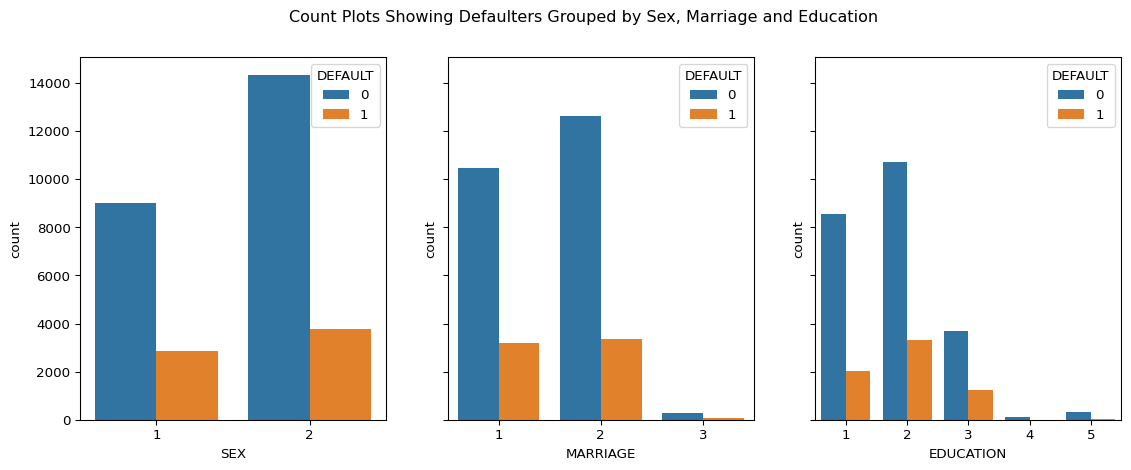

In [ ]:
# S4.1: Create count plots showing defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
import seaborn as sns
import matplotlib.pyplot as plt

fig1, axis1 = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5), dpi = 96, sharey = True)
sns.countplot(x = 'SEX', data = credit_card_df, hue = 'DEFAULT', ax = axis1[0])
sns.countplot(x = 'MARRIAGE', data = credit_card_df, hue = 'DEFAULT', ax = axis1[1])
sns.countplot(x = 'EDUCATION', data = credit_card_df, hue = 'DEFAULT', ax = axis1[2])
fig1.suptitle('Count Plots Showing Defaulters Grouped by Sex, Marriage and Education')
plt.show()

Similarly, you can create box plots displaying the age and credit limit of defaulters grouped by `'SEX', 'MARRIAGE'` and `'EDUCATION'` in just one figure.

**Note:**

- To get an axis at second row and third column from a grid of, say 3 rows and 5 columns figure, use `axis[1, 2]`.

- Whenever you have more than one input values to the `y` parameter in any kind of plot, make sure that `sharey` parameter is set to `False` inside the `subplots()` function.

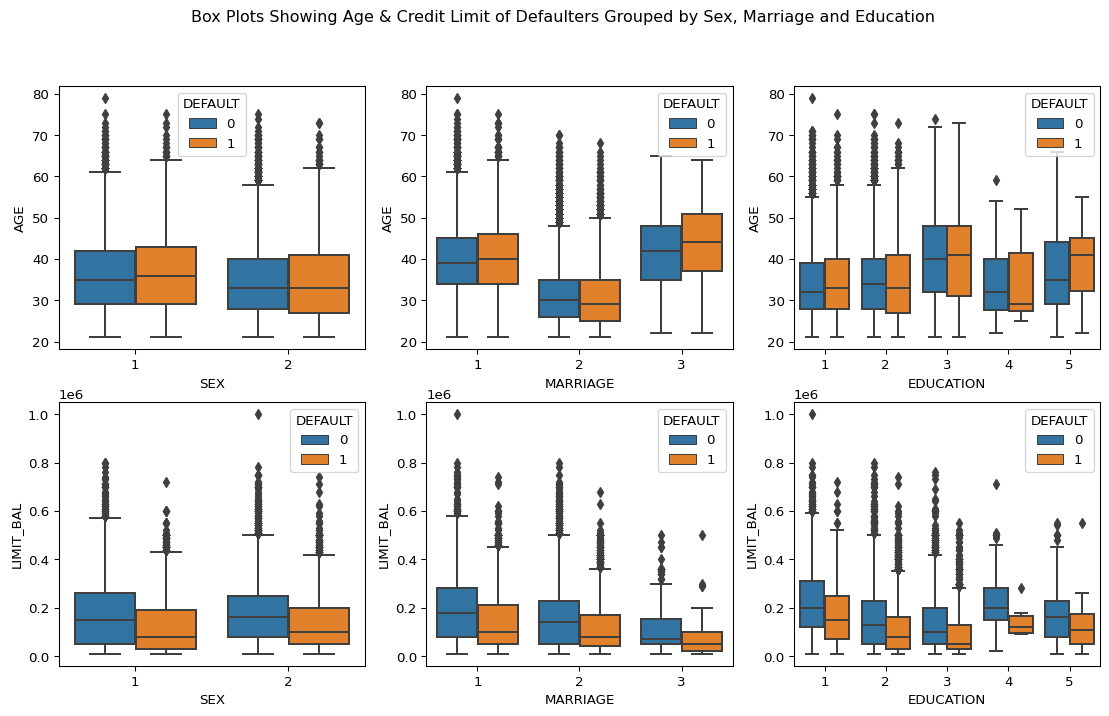

In [ ]:
# S4.2: Create box plots displaying the age and credit limit of defaulters grouped by 'SEX', 'MARRIAGE' and 'EDUCATION' in just one figure.
fig2, axis2 = plt.subplots(nrows = 2, ncols = 3, figsize = (14, 8), dpi = 96, sharey = False)

sns.boxplot(x = 'SEX', y = 'AGE', hue = 'DEFAULT', data = credit_card_df, ax = axis2[0, 0])
sns.boxplot(x = 'MARRIAGE', y = 'AGE', hue = 'DEFAULT', data = credit_card_df, ax = axis2[0, 1])
sns.boxplot(x = 'EDUCATION', y = 'AGE', hue = 'DEFAULT', data = credit_card_df, ax = axis2[0, 2])
# For 'LIMIT_BAL' column.
sns.boxplot(x = 'SEX', y = 'LIMIT_BAL', hue = 'DEFAULT', data = credit_card_df, ax = axis2[1, 0])
sns.boxplot(x = 'MARRIAGE', y = 'LIMIT_BAL', hue = 'DEFAULT', data = credit_card_df, ax = axis2[1, 1])
sns.boxplot(x = 'EDUCATION', y = 'LIMIT_BAL', hue = 'DEFAULT', data = credit_card_df, ax = axis2[1, 2])
fig2.suptitle('Box Plots Showing Age & Credit Limit of Defaulters Grouped by Sex, Marriage and Education')
plt.show()

Let's stop here. We will learn to build a decision tree model to predict the credit card payment defaulters in the next class.

---

---